### File containing the functionalities of our bayesian model

## I. Prerequesites

**1. Import Packages**

In [1]:
import arviz as az
import numpy as np
import pandas as pd
import pystan
import patsy as ps
from sklearn.model_selection import TimeSeriesSplit

from data_gathering import gather_data_actuals, gather_data_features
from data_preparation import standardize, take_logarithm
from data_modelling_bayes import calculate_crps, generate_penalty_matrix
from mappings import import_country_mapping

C:\Users\Uwe Drauz\anaconda3\envs\bachelor_thesis_pymc\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ModuleNotFoundError: No module named 'pystan'

**2. Define functions**

In [ ]:
k_test = generate_penalty_matrix(14)

In [ ]:
k_test

In [ ]:
np.linalg.matrix_rank(k_test)

In [ ]:
# # Note: WIP
# def model_training(df:pd.DataFrame, model_params: dict, validation_year: int, K:int):
#     # Extracting year and month from month_id
#     df['year'] = ((df['month_id'] - 1) // 12) + 1990
#     df['month'] = ((df['month_id'] - 1) % 12) + 1
# 
#     # Step 1: Split data into training and test sets
#     train_data = df[(df['year'] >= 1990) & (df['year'] < 2018)]
#     test_data = df[df['year'] == 2018]
# 
#     # Step 2: Perform "10-Fold" time series cross-validation within the training set with a 2-month-gap
#     tscv = TimeSeriesSplit(n_splits=K)
# 
#     for train_index, val_index in tscv.split(train_data):
#         # Extract train and validation sets for the current fold
#         train_fold = train_data.iloc[train_index]
#         val_fold = train_data.iloc[val_index]
# 
#         # Exclude last two months (November and December) from the training set
#         train_fold = train_fold[~((train_fold['month'] == 11) | (train_fold['month'] == 12))]
# 
#         # Step 3: Train the model on the training set
#         model, trace = build_bayesian_model(df, model_params)
# 
#         # Step 4: Predict the validation set
#         crps_scores, crps_average = calculate_crps(trace, val_fold)
# 


In [ ]:
# # Note WIP
# model_params = {
#     "coords": COORDS,
#     "intercept_prior_sigma": 0.1,
#     "slopes_prior_mu": 0.0,
#     "slopes_prior_sd": 10,
#     "alpha_prior_alpha": 0.1,
#     "alpha_prior_beta": 0.1,
#     "regressors_data": [df.ged_sb_tlag_1.to_numpy(), df.ged_sb_tsum_24.to_numpy()],  # Add more predictors' data as needed
#     "Y_data": df.ged_sb.to_numpy(),
#     "regularization_param": 0.01,  # Add your desired regularization parameter value
#     "num_knots": 10,  # Add your desired number of knots for P-splines
#     "draws": 1000,
#     "tune": 2000,
#     "random_seed": rng,
#     "target_accept": 0.95
# }


In [ ]:
# # Note: WIP
# def build_bayesian_model(df: pd.DataFrame(), model_params: dict):
#     """
#     Build the Bayesian model for the negative binomial regression with P-splines.
# 
#     Parameters:
#         df (pd.DataFrame): DataFrame containing the data.
#         model_params (dict): Dictionary containing the model parameters.
# 
#     Returns:
#         model: PyMC3 model object
#         trace: PyMC3 trace object
#     """
#     # Extract the model parameters
#     coords = model_params["coords"]
#     intercept_prior_sigma = model_params["intercept_prior_sigma"]
#     slopes_prior_mu = model_params["slopes_prior_mu"]
#     slopes_prior_sd = model_params["slopes_prior_sd"]
#     alpha_prior_alpha = model_params["alpha_prior_alpha"]
#     alpha_prior_beta = model_params["alpha_prior_beta"]
#     regressors_data = model_params["regressors_data"]
#     Y_data = model_params["Y_data"]
#     regularization_param = model_params["regularization_param"]
#     num_knots = model_params["num_knots"]
#     draws = model_params["draws"]
#     tune = model_params["tune"]
#     random_seed = model_params["random_seed"]
#     target_accept = model_params["target_accept"]
# 
#     # Build the model
#     with pm.Model(coords=coords) as bayesian_model_nb:
#         # Define the priors for the intercept, slopes, and over-dispersion parameter
#         intercept = pm.Normal("intercept", 0.0, intercept_prior_sigma)
#         slopes = pm.Normal("slopes", slopes_prior_mu, slopes_prior_sd, dims="predictors")
#         alpha = pm.Gamma('alpha', alpha_prior_alpha, alpha_prior_beta)
# 
#         # Specify the data
#         X = []
#         for i in range(len(regressors_data)):
#             X.append(pm.ConstantData("X{}".format(i), regressors_data[i], dims="obs_idx"))
#         Y = pm.ConstantData("Y", Y_data, dims="obs_idx")
# 
#         # Define the basis functions
#         knots = np.linspace(df['month_id'].min(), df['month_id'].max(), num_knots + 2)[1:-1]
#         basis_funcs = pm.spline.make_spline_basis(knots, degree=3)
# 
#         # Define the coefficients for the basis functions
#         beta = pm.Normal("beta", mu=0, sigma=regularization_param, dims="basis_funcs")
# 
#         # Define the mean of the negative binomial distribution
#         mu = pm.math.exp(intercept + pm.math.dot(X, slopes) + pm.math.dot(basis_funcs, beta))
# 
#         # Define the likelihood
#         obs = pm.NegativeBinomial("obs", mu=mu, alpha=alpha, observed=Y, dims="obs_idx")
# 
#         # Run the sampling using the No-U-Turn Sampler (NUTS) for the specified number of samples
#         trace = pm.sample(draws=draws, tune=tune, random_seed=random_seed, target_accept=target_accept)
# 
#         return bayesian_model_nb, trace
# 


In [ ]:
def add_year_column(df: pd.DataFrame) -> pd.DataFrame:
    # Extracting year from month_id by dividing by 12 and adding the base year 1990
    df['year'] = ((df['month_id'] - 1) // 12) + 1990
    return df

**3. Set style and generate random seed**

In [ ]:
az.style.use("arviz-darkgrid")
RANDOM_SEED = 58
rng = np.random.default_rng(RANDOM_SEED)

## II. Data Preparation

 **1. Load data**

In [ ]:
data_cm_actual_2018, data_cm_actual_2019, data_cm_actual_2020, data_cm_actual_2021, data_cm_actual_allyears \
    = gather_data_actuals()
# Load features data
data_cm_features_2017, data_cm_features_2018, data_cm_features_2019, data_cm_features_2020, data_cm_features_allyears \
    = gather_data_features()

In [ ]:
predictors = ['ged_sb_tlag_1', 'ged_sb_tsum_24']
target_variable = ['ged_sb']
country_mapping = import_country_mapping()
country = 'Syria'
country_id = country_mapping.loc[country_mapping['name'] == country, 'country_id'].iloc[0]

In [ ]:
X = data_cm_features_allyears.loc[data_cm_features_allyears['country_id'] == country_id, predictors]
y = data_cm_features_allyears.loc[data_cm_features_allyears['country_id'] == country_id, target_variable]
X = X.reset_index(drop=True, inplace=False)
y = y.reset_index(drop=True, inplace=False)

**2. Standardize data and/or take loagrithm of data**

In [ ]:
# Standardize target variable y
y_std = standardize(y)

# Calculate the standardized logarithm of input data X
X_std= standardize(X)
X_std_log = take_logarithm(X_std)

**3. Create data frames with standardized and/or logarithmized data**

In [ ]:
# Create data frame with target variable and standardized input data
df_Y_non_std_X_std = pd.concat([y, X_std], axis=1)
# Create data frame with standardized target variable and standardized input data
df_Y_std_X_std = pd.concat([y_std, X_std], axis=1)
# Create data frame with target variable and standardized logarithm of input data
df_Y_non_std_X_std_log = pd.concat([y, X_std_log], axis=1)
# Create data frame with standardized target variable and standardized logarithm of input data
df_Y_std_X_std_log = pd.concat([y_std, X_std_log], axis=1)

**4. Define which data to use**

In [ ]:
df = df_Y_std_X_std

## III. Model Building

**1. Build Bayesian model with Gaussian distribution**

**2. Build Bayesian model with Negative Binomial distribution (alpha HalfNormal distributed)**

**3. Build Bayesian model with Negative Binomial distribution (alpha Gamma distributed)**

**4. Build Bayesian model with Negative Binomial distribution (alpha Gamma distributed) and regression splines (B-Splines)**

Test functionality with simulated data

Test with actual data

In [12]:
dataX1 = df.ged_sb_tlag_1.to_numpy()
dataX2 = df.ged_sb_tsum_24.to_numpy()
dataY = df.ged_sb.to_numpy()
# Note: If knots are intended to be not equally spaces (e.g. set by quantiles) the consequence on penalized splines has to be evaluated
# Define the knot positions
num_knots = 10
spline_degree = 3
# We define the knot list such that we'll have num_knots knot inbetween the boundaries of the data
knot_list_X1 = np.linspace(dataX1.min(), dataX1.max(), num_knots + 2)[1:-1]
knot_list_X2 = np.linspace(dataX2.min(), dataX2.max(), num_knots + 2)[1:-1]

# Define the basis functions
# Note: We include the intercept once in the model via the intercept parameter, to prevent having additional '1' columns in basis functions include_intercept is set to False and automatic creation of '1' column of patsy is prevented by '-1'
basis_X1 = ps.dmatrix("bs(X1, knots=knots, degree=spline_degree, include_intercept=False) -1", {"X1": dataX1, "knots": knot_list_X1, "spline_degree": spline_degree})
basis_X2 = ps.dmatrix("bs(X2, knots=knots, degree=spline_degree, include_intercept=False) -1", {"X2": dataX2, "knots": knot_list_X2, "spline_degree": spline_degree})
# Define variables for tau priors
a_X1 = a_X2 = 500
b_X1 = b_X2 = 0.0001

no_X1_coefficients = basis_X1.shape[1]
no_X2_coefficients = basis_X2.shape[1]
K_X1 = generate_penalty_matrix(no_X1_coefficients)
K_X2 = generate_penalty_matrix(no_X2_coefficients)

In [13]:
num_basis_X1 = basis_X1.shape[1]
num_basis_X2 = basis_X2.shape[1]

In [29]:
np.asarray(basis_X1, order="F").shape

(370, 14)

In [27]:
len(knot_list_X1)

10

### STAN model (WIP)

In [14]:
a_tau_X1 = 1
b_tau_X1 = 0.005
a_tau_X2 = 1
b_tau_X2 = 0.005

In [74]:
"""
STAN syntax explained:
int variable_name[N] = array of length N containing integers
real variable_name[N] = array of length N containing decimals
"""

'\nSTAN syntax explained:\nint variable_name[N] = array of length N containing integers\nreal variable_name[N] = array of length N containing decimals\n'

In [ ]:
model_b_spline = """
data {
    int<lower=0> N;                      // Number of data points
    int<lower=1> num_basis_X1;           // Number of coefficients for P-splines for X1
    int<lower=1> num_basis_X2;           // Number of coefficients for P-splines for X2

    real X1[N];                           // Regressor X1
    real X2[N];                           // Regressor X2
    matrix[N, num_basis_X1] basis_X1;    // Basis matrix for regressor X1
    matrix[N, num_basis_X2] basis_X2;    // Basis matrix for regressor X2
    int Y[N];                            // Observed Target variable
}
"""

In [19]:
model_b_spline_penalized = """
data {
    int<lower=0> N;                      // Number of data points
    int<lower=1> num_basis_X1;           // Number of coefficients for P-splines for X1
    int<lower=1> num_basis_X2;           // Number of coefficients for P-splines for X2

    real X1[N];                           // Regressor X1
    real X2[N];                           // Regressor X2
    matrix[N, num_basis_X1] basis_X1;    // Basis matrix for regressor X1
    matrix[N, num_basis_X2] basis_X2;    // Basis matrix for regressor X2
    int Y[N];                            // Observed Target variable
    real a_tau_X1;                       // Shape parameter for InverseGamma of tau for X1
    real b_tau_X1;                       // Scale parameter for InverseGamma of tau for X1
    real a_tau_X2;                       // Shape parameter for InverseGamma of tau for X2
    real b_tau_X2;                       // Scale parameter for InverseGamma of tau for X2
}

parameters {
    vector[num_basis_X1] spline_coefficients_X1_raw;
    vector[num_basis_X2] spline_coefficients_X2_raw;
    real spline_coefficients_X1_0;
    real spline_coefficients_X2_0;
    real<lower=0> tau_X1;
    real<lower=0> tau_X2;
    real<lower=0> alpha;
}

transformed parameters {
    vector[num_basis_X1] spline_coefficients_X1;
    vector[num_basis_X2] spline_coefficients_X2;
    vector[N] mu;
    
    spline_coefficients_X1[1] = spline_coefficients_X1_raw[1];
    for (i in 2:num_basis_X1) {
        spline_coefficients_X1[i] = spline_coefficients_X1_raw[i-1] * tau_X1;
    }

    spline_coefficients_X2[1] = spline_coefficients_X2_raw[1];
    for (i in 2:num_basis_X2) {
        spline_coefficients_X2[i] = spline_coefficients_X2_raw[i-1] * tau_X2;
    }
    mu = exp(spline_coefficients_X1_0 * to_vector(X1) + to_vector(basis_X1 * spline_coefficients_X1) + spline_coefficients_X2_0 * to_vector(X2) + to_vector(basis_X2 * spline_coefficients_X2));
}

model {
    spline_coefficients_X1_raw ~ normal(0, 1);      // should have something like a sd of tau because of multiplication with tau
    spline_coefficients_X2_raw ~ normal(0, 1);
    tau_X1 ~ inv_gamma(a_tau_X1, b_tau_X1);
    tau_X2 ~ inv_gamma(a_tau_X2, b_tau_X2);
    alpha ~ gamma(0, 0.1);
    Y ~ neg_binomial_2(mu, alpha);
}
"""



In [ ]:
model_b_spline_penalized_personal_approach = """
data {
    int<lower=0> N;                      // Number of data points
    int<lower=1> num_basis_X1;           // Number of coefficients for P-splines for X1
    int<lower=1> num_basis_X2;           // Number of coefficients for P-splines for X2

    real X1[N];                           // Regressor X1
    real X2[N];                           // Regressor X2
    matrix[N, num_basis_X1] basis_X1;    // Basis matrix for regressor X1
    matrix[N, num_basis_X2] basis_X2;    // Basis matrix for regressor X2
    int Y[N];                            // Observed Target variable
    real a_tau_X1;                       // Shape parameter for InverseGamma of tau for X1
    real b_tau_X1;                       // Scale parameter for InverseGamma of tau for X1
    real a_tau_X2;                       // Shape parameter for InverseGamma of tau for X2
    real b_tau_X2;                       // Scale parameter for InverseGamma of tau for X2
}

parameters {
    vector[num_basis_X1] spline_coefficients_X1;
    vector[num_basis_X2] spline_coefficients_X2;
    real intercept;
    real<lower=0> tau_X1;
    real<lower=0> tau_X2;
    real<lower=0> alpha;
}

transformed parameters {
    vector[N] mu;
    mu = exp(intercept + to_vector(basis_X1 * spline_coefficients_X1) + to_vector(basis_X2 * spline_coefficients_X2));
}

model {
    tau_X1 ~ inv_gamma(a_tau_X1, b_tau_X1);
    tau_X2 ~ inv_gamma(a_tau_X2, b_tau_X2);

    spline_coefficients_X1[1] ~ normal(0, 10);      // diffuse prior for first coefficient
    for (i in 2:num_basis_X1) {                     // random walk prior for coefficients
        spline_coefficients_X1[i] ~ normal(spline_coefficients_X1[i-1], tau_X1);
    }
    
    spline_coefficients_X2[1] ~ normal(0, 10);      // diffuse prior for first coefficient
    for (i in 2:num_basis_X2) {                     // random walk prior for coefficients
        spline_coefficients_X2[i] ~ normal(spline_coefficients_X2[i-1], tau_X2);
    }
    
    alpha ~ gamma(0.1, 0.1);
    Y ~ neg_binomial_2(mu, alpha);
}
"""



In [22]:
stan_code = model_rw

stan_data = {
    'N': len(dataY),
    'num_basis_X1': num_basis_X1,
    'num_basis_X2': num_basis_X1,
    'basis_X1': np.asarray(basis_X1, order="F"),
    'basis_X2': np.asarray(basis_X2, order="F"),
    'Y': dataY.astype(int),
    'X1': dataX1,
    'X2': dataX2,
    'K_X1': K_X1,
    'K_X2': K_X2,
    'a_tau_X1': a_tau_X1,
    'b_tau_X1': b_tau_X1,
    'a_tau_X2': a_tau_X2,
    'b_tau_X2': b_tau_X2
}
# Compile and run the Stan model
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7e2b0c84b66b9a90b9a741f732083084 NOW.


In [ ]:
stan_rw = stan_model.sampling(data=stan_data, iter=1000, chains=4, seed=123, control={'adapt_delta': 0.95}, verbose=True)

In [21]:
model_mv = """
data {
    int<lower=1> N;          // Number of data points
    int<lower=1> num_basis_X1;  // Number of coefficients for P-splines for X1
    int<lower=1> num_basis_X2;  // Number of coefficients for P-splines for X2

    matrix[N, num_basis_X1] basis_X1;  // Basis matrix for regressor X1
    matrix[N, num_basis_X2] basis_X2;  // Basis matrix for regressor X2
    int Y[N];             // Observed Target variable
    
    matrix[num_basis_X1, num_basis_X1] K_X1;  // Penalty matrix for X1
    matrix[num_basis_X2, num_basis_X2] K_X2;  // Penalty matrix for X2
    
    real a_tau_X1;              // Shape parameter for InverseGamma of tau for X1
    real b_tau_X1;              // Scale parameter for InverseGamma of tau for X1
    real a_tau_X2;            // Shape parameter for InverseGamma of tau for X2
    real b_tau_X2;            // Scale parameter for InverseGamma of tau for X2
}

parameters {
    real intercept;                           // regression intercept
    vector[num_basis_X1] spline_coefficients_X1; // Spline coefficients for X1
    vector[num_basis_X2] spline_coefficients_X2; // Spline coefficients for X2
    real<lower=0> tau_X1;                        // Precision parameter for Gaussian random walk for X1
    real<lower=0> tau_X2;                      // Precision parameter for Gaussian random walk for X2
    real<lower=0> alpha;                      // Negative Binomial dispersion parameter
}
transformed parameters {
    vector[N] mu; // Mean of Negative Binomial distribution
    matrix[num_basis_X1, num_basis_X1] covariance_matrix_X1;  // Covariance matrix for X1
    matrix[num_basis_X2, num_basis_X2] covariance_matrix_X2;  // Covariance matrix for X2

    mu = exp(intercept + basis_X1 * spline_coefficients_X1 + basis_X2 * spline_coefficients_X2); //taking exponential as a link function of a GAM

    precision_matrix_X1 = K_X1 / pow(tau_X1, 2);  // Defining precision matrix for X1
    precision_matrix_X2 = K_X2 / pow(tau_X2, 2);  // Defining precision matrix for X2
}

model {
    // Priors
    intercept ~ normal(0, 10);               // Diffuse prior for intercept
    tau_X1 ~ inv_gamma(a_tau_X1, b_tau_X1);  // Inverse Gamma prior for tau_X1
    tau_X2 ~ inv_gamma(a_tau_X2, b_tau_X2);  // Inverse Gamma prior for tau_X2
    alpha ~ gamma(0.1, 0.1);              // Gamma prior for alpha
    
    spline_coefficients_X1 ~ multi_normal_prec(rep_vector(0, num_basis_X1), precision_matrix_X1);  // Prior for spline coefficients for X1
    spline_coefficients_X2 ~ multi_normal_prec(rep_vector(0, num_basis_X2), precision_matrix_X2);  // Prior for spline coefficients for X2

    // Likelihood
    Y ~ neg_binomial_2(mu, alpha);
}
generated quantities {
    int y_pred_train[N];
    int y_pred_eval[N_eval];
    vector[N_eval] mu_eval;
    
    mu_eval = exp(intercept + to_vector(basis_X1_eval * spline_coefficients_X1) + to_vector(basis_X2_eval * spline_coefficients_X2));
    for (n in 1:N) {
        y_pred_train[n] = neg_binomial_2_rng(mu[n], alpha);
    }
    for (n_eval in 1:N_eval) {
        y_pred_eval[n_eval] = neg_binomial_2_rng(mu_eval[n_eval], alpha);
    }

"""



**Synthesize data to test model functionality**

In [52]:
import scipy.stats as stats
# Number of data points
N = 400
n_samples = 500
num_basis_X1 = 14
num_basis_X2 = 14
spline_degree = 3

# Generate data
np.random.seed(42) 
dataX1 = np.linspace(0, 10, N)
dataX2 = np.sin(dataX1) + 0.5 * np.random.normal(size=N)

# We define the knot list such that we'll have num_knots knot inbetween the boundaries of the data
knot_list_X1 = np.linspace(dataX1.min(), dataX1.max(), num_knots + 2)[1:-1]
knot_list_X2 = np.linspace(dataX2.min(), dataX2.max(), num_knots + 2)[1:-1]

# Define the basis functions
basis_X1 = ps.dmatrix("bs(X1, knots=knots, degree=spline_degree, include_intercept=False) -1", {"X1": dataX1, "knots": knot_list_X1, "spline_degree": spline_degree})
basis_X2 = ps.dmatrix("bs(X2, knots=knots, degree=spline_degree, include_intercept=False) -1", {"X2": dataX2, "knots": knot_list_X2, "spline_degree": spline_degree})

# Define variables for tau priors
K_X1 = generate_penalty_matrix(num_basis_X1)
K_X2 = generate_penalty_matrix(num_basis_X2)

# Define parameters consistent with priors of intended stan model
intercept = stats.norm.rvs(loc=0, scale=10, size=n_samples)
intercept_mean = np.mean(intercept)

tau_X1 = stats.invgamma.rvs(a=a_tau_X1, scale=b_tau_X1, size=n_samples)
mean_tau_X1 = np.mean(tau_X1)
tau_X2 = stats.invgamma.rvs(a=a_tau_X2, scale=b_tau_X2, size=n_samples)
mean_tau_X2 = np.mean(tau_X2)

cov_X1 = np.linalg.inv(K_X1 / mean_tau_X1 ** 2)
cov_X2 = np.linalg.inv(K_X2 / mean_tau_X2 ** 2)
spline_coefficients_X1 = stats.multivariate_normal.rvs(mean=np.zeros(num_basis_X1), cov=cov_X1, size=n_samples)
spline_coefficients_X2 = stats.multivariate_normal.rvs(mean=np.zeros(num_basis_X2), cov=cov_X2, size=n_samples)
spline_coefficients_X1_mean = np.mean(spline_coefficients_X1, axis=0)
spline_coefficients_X2_mean = np.mean(spline_coefficients_X2, axis=0)

alpha = stats.gamma.rvs(a=0, scale=0.1, size=n_samples)
alpha_mean = np.mean(alpha)

mu = intercept_mean + basis_X1 @ spline_coefficients_X1_mean + basis_X2 @ spline_coefficients_X2_mean

Y = stats.nbinom.rvs(n=alpha_mean, p= alpha_mean/ (alpha_mean + mu), size=N)

# Data dictionary for Stan
data_for_stan = {
    'N': N,
    'num_basis_X1': num_basis_X1,
    'num_basis_X2': num_basis_X2,
    'basis_X1': basis_X1,
    'basis_X2': basis_X2,
    'Y': Y,
    'K_X1': K_X1,
    'K_X2': K_X2,
    'a_tau_X1': a_tau_X1,
    'b_tau_X1': b_tau_X1,
    'a_tau_X2': a_tau_X2,
    'b_tau_X2': b_tau_X2
}


LinAlgError: Singular matrix

In [ ]:
# # Compile and run the Stan model
# stan_model = pystan.StanModel(model_code=model_mv)
# stan_fit = stan_model.sampling(data=data_for_stan, iter=1000, chains=4, seed=123, control={'adapt_delta': 0.95})

In [20]:
stan_code = model_rw

stan_data = {
    'N': len(dataY),
    'num_basis_X1': num_basis_X1,
    'num_basis_X2': num_basis_X1,
    'basis_X1': np.asarray(basis_X1, order="F"),
    'basis_X2': np.asarray(basis_X2, order="F"),
    'Y': dataY.astype(int),
    'K_X1': K_X1,
    'K_X2': K_X2,
    'a_tau_X1': a_tau_X1,
    'b_tau_X1': b_tau_X1,
    'a_tau_X2': a_tau_X2,
    'b_tau_X2': b_tau_X2
}
# Compile and run the Stan model
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7e2b0c84b66b9a90b9a741f732083084 NOW.


In [21]:
stan_fit = stan_model.sampling(data=stan_data, iter=1000, chains=4, seed=123, control={'adapt_delta': 0.95})

RuntimeError: Exception: variable does not exist; processing stage=data initialization; variable name=X1; base type=double  (in 'unknown file name' at line 7)


Test Three

In [55]:
Y = df.ged_sb.to_numpy()
for x in Y: int(x); Y
Y.astype(int)

array([   0,   54,  149,   39,    8,    0,  545,    0,    0,  631,   27,
         25,    3,    5,  190, 1885,  182,   52,   82,  320,   20,  239,
        279,   45,    0,   35,    5,   99,  794,  182,  161, 2694,   67,
        150,    0,  100,  122, 1589,   30,   37, 1034,   51,  372,  272,
         75,  168,  306,   15, 1271,  260,  552, 1419,  147,  393,  311,
       2072,  483,  199,   55, 1775,  294,   75,  956, 1027, 1044,  321,
        239,  280,  105,  629,  406,  123,   98,  122,  155,  388,  194,
        160,  150,  129,  550,  513,  645,   73,   69,  182,  243,  228,
       1553,  605,  177,  225, 2533,  425,   58,   98,   34,   65,  194,
         15,   69,  105,  426, 2144, 1123,  572,  376, 1133,  162,   16,
         47,  113,  320,  150,  480, 1638,  703,  769,  162,   69,   54,
         86,  267,  205,  376,   70, 1123,  864, 1850,  224,   78,   38,
        147,    1,   11,  114,  103,  398,  132,   27,  299, 1216, 1399,
       1208,  148,    4,  562,   27,   24,    6,   

In [36]:
# Read in the data
y = pd.read_csv('https://raw.github.com/wiki/stan-dev/rstan/rats.txt', sep=" ").values
x = np.array([8, 15, 22, 29, 36])
xbar = np.mean(x)
N, T = y.shape

# Load the Stan model code
stan_code = """
// Copy the content from https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan
"""

# Compile the Stan model
sm = pystan.StanModel(model_code=stan_code)

# Fit the model
rats_fit = sm.sampling(data={'N': N, 'T': T, 'y': y, 'x': x, 'xbar': xbar})

# Print the summary
print(rats_fit)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4da3566ca4f53e669008f1f0b80bdf21 NOW.


RuntimeError: Must use algorithm="Fixed_param" for model that has no parameters.

### Test funtionality with simulated data

##Step 1: Import Libraries

In [1]:
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy as ps


##Step 2: Generate simulated data

In [6]:
# Number of data points
N = 500

# Generate synthetic data
np.random.seed(42)
x1 = np.linspace(0, 10, N)
x2 = np.linspace(0, 10, N)
noise = np.random.normal(0, 0.5, N)

# Simulate a nonlinear function
y = (np.sin(x1) + np.sin(x2) + noise).astype(int)
y = np.clip(y, 0, None)  # Ensure counts are non-negative

# Convert the data into basis matrices for splines
num_knots = 10
splines_degree = 3

knot_list_X1 = np.linspace(x1.min(), x1.max(), num_knots+2)[1:-1]
knot_list_X2 = np.linspace(x2.min(), x2.max(), num_knots+2)[1:-1]

basis_X1 = ps.dmatrix(f"bs(X1, knots=knots, degree=splines_degree, include_intercept=False) -1", {"X1": x1, "knots": knot_list_X1, "splines_degree": splines_degree})
basis_X2 = ps.dmatrix(f"bs(X2, knots=knots, degree=splines_degree, include_intercept=False) -1", {"X2": x2, "knots": knot_list_X2, "splines_degree": splines_degree})

data = {
    'N': N,
    'num_basis_X1': basis_X1.shape[1],
    'num_basis_X2': basis_X2.shape[1],
    'basis_X1': np.asarray(basis_X1, order="F"),
    'basis_X2': np.asarray(basis_X2, order="F"),
    'Y': y,
    'a_tau_X1': 1,
    'b_tau_X1': 0.005,
    'a_tau_X2': 1,
    'b_tau_X2': 0.005
}


Step 3: Visualize the Simulated Data

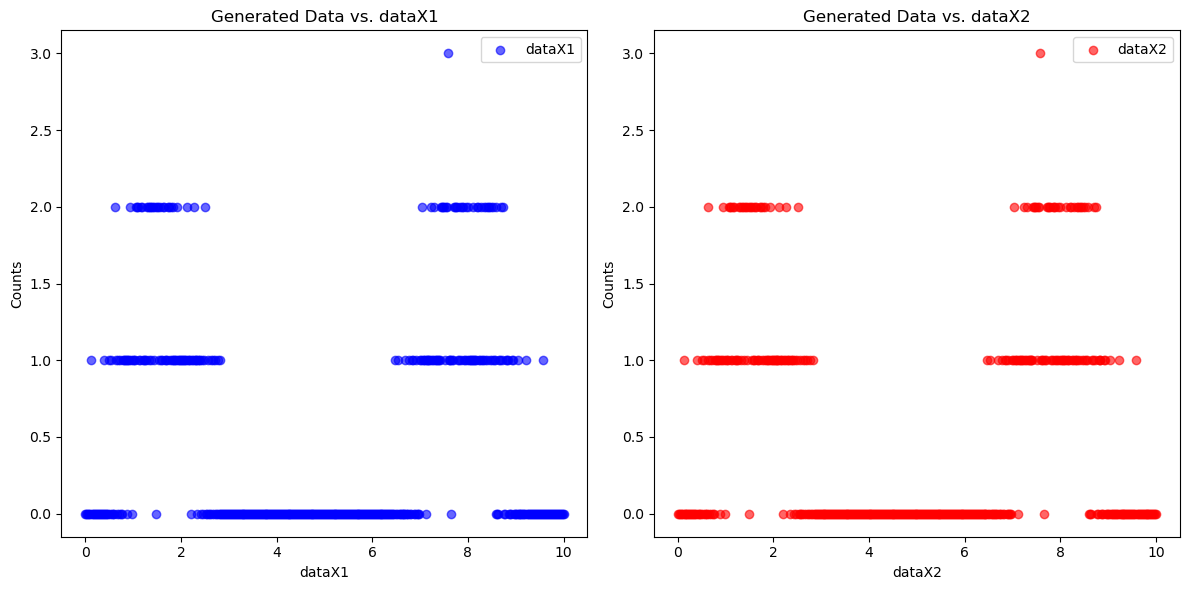

In [3]:
# Visualizing data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(x1, y, color='blue', alpha=0.6, label="dataX1")
axes[0].set_title('Generated Data vs. dataX1')
axes[0].set_xlabel('dataX1')
axes[0].set_ylabel('Counts')
axes[0].legend()

axes[1].scatter(x2, y, color='red', alpha=0.6, label="dataX2")
axes[1].set_title('Generated Data vs. dataX2')
axes[1].set_xlabel('dataX2')
axes[1].set_ylabel('Counts')
axes[1].legend()

plt.tight_layout()
plt.show()


##Step 4: Define the Stan Model

In [4]:
model = """
data {
    int<lower=0> N;                      // Number of data points
    int<lower=1> num_basis_X1;           // Number of coefficients for P-splines for X1
    int<lower=1> num_basis_X2;           // Number of coefficients for P-splines for X2

    matrix[N, num_basis_X1] basis_X1;    // Basis matrix for regressor X1
    matrix[N, num_basis_X2] basis_X2;    // Basis matrix for regressor X2
    int Y[N];                            // Observed Target variable
    real a_tau_X1;                       // Shape parameter for InverseGamma of tau for X1
    real b_tau_X1;                       // Scale parameter for InverseGamma of tau for X1
    real a_tau_X2;                       // Shape parameter for InverseGamma of tau for X2
    real b_tau_X2;                       // Scale parameter for InverseGamma of tau for X2
}

parameters {
    real intercept;
    vector[num_basis_X1] spline_coefficients_X1;
    vector[num_basis_X2] spline_coefficients_X2;
    real<lower=0> tau_X1;
    real<lower=0> tau_X2;
    real<lower=0> alpha;
}

transformed parameters {
    vector[N] mu;
    mu = exp(intercept + basis_X1 * spline_coefficients_X1 + basis_X2 * spline_coefficients_X2);
}

model {
    intercept ~ normal(0, 1);

    tau_X1 ~ inv_gamma(a_tau_X1, b_tau_X1);
    tau_X2 ~ inv_gamma(a_tau_X2, b_tau_X2);
    alpha ~ gamma(0, 0.1);

    spline_coefficients_X1[1] ~ normal(0, 1);  // Assuming a diffuse prior for the first coefficient.
    for (i in 2:num_basis_X1) {
        spline_coefficients_X1[i] ~ normal(spline_coefficients_X1[i-1], tau_X1);
    }

    spline_coefficients_X2[1] ~ normal(0, 1);  // Again, assuming a diffuse prior for the first coefficient.
    for (i in 2:num_basis_X2) {
        spline_coefficients_X2[i] ~ normal(spline_coefficients_X2[i-1], tau_X2);
    }

    Y ~ neg_binomial_2(mu, alpha);
}
"""



##Step 5: Compile and Run the Stan Model

In [7]:
sm = pystan.StanModel(model_code=model)
fit = sm.sampling(data=data, iter=1000, chains=4)
print(fit)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8ea56801efb494f627c4e55d064e86e4 NOW.


RuntimeError: Initialization failed.

In [32]:
dataY.max()

7.588633466552457

## Original draft for PyMC Bayesian model with Negative Binomial distribution (alpha Gamma distributed) and penalized regression splines

In [14]:
dataX1 = df.ged_sb_tlag_1.to_numpy()
dataX2 = df.ged_sb_tsum_24.to_numpy()
dataY = df.ged_sb.to_numpy()
# Note: If knots are intended to be not equally spaces (e.g. set by quantiles) the consequence on penalized splines has to be evaluated
# Define the knot positions
num_knots = 10

# We define the knot list such that we'll have num_knots knot inbetween the boundaries of the data
knot_list_X1 = np.linspace(dataX1.min(), dataX1.max(), num_knots + 2)[1:-1]
knot_list_X2 = np.linspace(dataX2.min(), dataX2.max(), num_knots + 2)[1:-1]

# Define the basis functions
# ToDo: How do we include the intercept?
# ToDo: Why '-1' in the formula?
basis_X1 = ps.dmatrix("bs(X1, knots=knots, degree=3, include_intercept=False) -1", {"X1": dataX1, "knots": knot_list_X1})
basis_X2 = ps.dmatrix("bs(X2, knots=knots, degree=3, include_intercept=False) -1", {"X2": dataX2, "knots": knot_list_X2})
# Define variables for tau priors
a_X1 = a_X2 = 500
b_X1 = b_X2 = 0.0001


def generate_penalty_matrix(no_coefficients):
    penalty_matrix = -2 * np.eye(no_coefficients) + np.eye(no_coefficients, k=1) + np.eye(no_coefficients, k=-1)
    penalty_matrix[0, 0] = 1
    penalty_matrix[no_coefficients - 1, no_coefficients - 1] = 1
    return penalty_matrix


no_X1_coefficients = basis_X1.shape[1]
no_X2_coefficients = basis_X2.shape[1]
K_X1 = generate_penalty_matrix(no_X1_coefficients)
K_X2 = generate_penalty_matrix(no_X2_coefficients)

In [ ]:
COORDS_penalized_splines = \
    {"obs_idx": df.index, "splines_x1_rest": np.arange(basis_X1.shape[1] -1), "splines_x2_rest": np.arange(basis_X2.shape[1] -1)}

# NOTE: WIP: Implementation of penalized regression splines still to be figured out, Version with Penalty deduction in likeihood
with pm.Model(coords=COORDS_penalized_splines) as bayesian_model_nb_gamma_penalized_splines_penalty_potential:
    # Specify the data
    X1 = pm.ConstantData("fatality lag t=1", dataX1, dims="obs_idx")
    X2 = pm.ConstantData("fatality rolling average t=24", dataX2, dims="obs_idx")
    Y = pm.ConstantData("fatility count", dataY, dims="obs_idx")

    # Define the priors for regressors and negative binomial over-dispersion parameter
    intercept = pm.HalfNormal("intercept", sigma=0.1)

    # Define first order random walk to incorporate regularization
    tau_X1 = pm.InverseGamma("tauX1", alpha=a_X1, beta=b_X1)
    tau_X2 = pm.InverseGamma("tauX2", alpha=a_X2, beta=b_X2)

    # Create deterministic variables for squared taus
    tau_X1_squared = pm.Deterministic("tau_X1_squared", tau_X1 ** 2)
    tau_X2_squared = pm.Deterministic("tau_X2_squared", tau_X2 ** 2)

    # Introduce flat priors for the first regression coeffcients of the splines
    beta_X1_0 = pm.Flat("slopesX1_0")
    beta_X2_0 = pm.Flat("slopesX2_0")
    
    # Define remaining betas as normal variables with standard deviation tau
    beta_X1_rest = pm.Normal("slopesX1_rest", 0.0, tau_X1, dims="splines_x1_rest")
    beta_X2_rest = pm.Normal("slopesX2_rest", 0.0, tau_X2, dims="splines_x2_rest")
    
    # Concatenate the flat priors to the beginning of the coefficients
    beta_X1 = pm.Deterministic("slopesX1", pm.math.concatenate([[beta_X1_0], beta_X1_rest]))
    beta_X2 = pm.Deterministic("slopesX2", pm.math.concatenate([[beta_X2_0], beta_X2_rest]))


    alpha = pm.Gamma('alpha', 0.1, 0.1)

    # Define mean of negative binomial distribution
    mu = pm.math.exp(intercept + pm.math.dot(np.asarray(basis_X1, order="F"), beta_X1.T) + pm.math.dot(np.asarray(basis_X2, order="F"), beta_X2.T))

    # Define the likelihood
    obs = pm.NegativeBinomial("obs", mu=mu, alpha=alpha, observed=Y, dims="obs_idx")

    # Define the penalty term and incorporate it using pm.Potential
    penalty_term_X1 = pm.math.dot(beta_X1.T, pm.math.dot(K_X1, beta_X1)) / (2 * tau_X1_squared)
    penalty_X1 = pm.Potential("penalty_X1", -penalty_term_X1)

    penalty_term_X2 = pm.math.dot(beta_X2, pm.math.dot(K_X2, beta_X2)) / (2 * tau_X2_squared)
    penalty_X2 = pm.Potential("penalty_X2", -penalty_term_X2)

    # Run the sampling using the No-U-Turn Sampler (NUTS) for the specified number of samples
    idata_bayesian_nb_gamma_penalized_splines_penalty_potential = pm.sample(draws=2000, tune=4000, random_seed=rng, target_accept=0.99)


**Visualisations**

In [12]:
# Plotting trace with parameters transformed back to original scale
# Plotting trace plots with appropriate size
az.plot_trace(np.exp(idata.posterior), var_names=["intercept", "slopesX1", "slopesX2"], combined=True, figsize=(10, 6))
az.plot_trace(idata.posterior, var_names=["alpha"], combined=True, figsize=(10, 3))

NameError: name 'idata' is not defined

In [ ]:
# Plotting posterior plots with appropriate size
az.plot_posterior(np.exp(idata.posterior), var_names=["intercept", "slopesX1", "slopesX2"])
az.plot_posterior(idata, var_names=["alpha"], figsize=(4, 3))

In [ ]:
# Plotting trace plots in logaritmic scale
az.plot_trace(idata, figsize=(10, 9))
az.plot_trace(idata, combined=True, figsize=(10, 9))
az.plot_posterior(idata)

In [ ]:
try:
    az.plot_ppc(idata, num_pp_samples=50, kind="scatter")
except Exception as error:
    print("Error", error)

**Summary Statistics**

In [ ]:
# Transform coefficients to recover parameter values
az.summary(np.exp(idata.posterior), kind="stats", var_names=["intercept", "slopesX1", "slopesX2"])

In [ ]:
az.summary(idata.posterior, kind="stats", var_names="alpha")

**CRPS evaluation**

In [ ]:
# Calculate CRPS for posterior predictive
crps_nb_gamma_penalized_splines, crps_average_nb_gamma_penalized_splines = calculate_crps(idata, actuals=y); crps_average_nb_gamma_penalized_splines